# Лабораторная работа 6. 
# Сетевые алгоритмы. Динамические алгоритмы поиска путей.


## Выполнил студент группы БФИ2001 Гуслистый Иван Сергеевич
***

### Задание

1.  Реализовать алгоритм поиска кратчайшего расстояния между двумя вершинами ориентированного взвешенного графа в соответствии с вариантом. 

2.  Предусмотреть задание графа в виде матрицы смежности/инцидентности, читаемой из файла, либо графически с помощью пользовательского интерфейса. 

3.  Разработать графический интерфейс пользователя с визуализацией графа и отображением кратчайшего расстояния между задаваемыми пользователем вершинами.

4. По результатам работы проанализировать временную сложность работы заданного алгоритма в зависимости от числа узлов и ребер графа.
Данные представить в виде таблицы.



### Алгоритмы:

Алгоритм Флойда-Уоршелла| Алгоритм Дейкстры | Алгоритм Беллмана-Форда | Алгоритм Джонсона| Алгоритм Левита | Алгоритм Йена



### Выполнение:

In [ ]:
# Команды для установки нужных библиотек
!pip install matplotlib
!pip install pandas
!pip install networkx

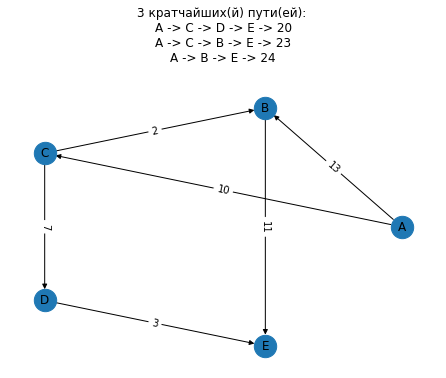

In [12]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

import queue

# Функция вывода путей в нужном формате
def create_output_title(p, c):
    shortest_path = str(find_count) + " кратчайших(й) пути(ей): \n"

    for i, path in enumerate(p):
        for j, node in enumerate(path):
            shortest_path += "{} -> ".format(node)

        shortest_path += str(c[i]) + "\n"

    return shortest_path


# Алгоритм Йены
def yen(g, p1, p2, K):

    # Определяем самый первый кратчайший путь и его стоимость
    A = [nx.dijkstra_path(g, p1, p2)]
    A_costs = [nx.dijkstra_path_length(g, p1, p2)]

    # Кандидаты, приоритетная очередь
    B = queue.PriorityQueue()

    for k in range(1, K):
        # Узел ветвления (от которого будем искать новый кратчайший путь)
        # в диапазоне от первого узла до последнего в предыдущем к-кратчайшем пути
        for i in range(len(A[k - 1]) - 1):
            # Узел ветвления получаем из предыдущего кратчайшего пути
            spur_node = A[k - 1][i]
            # Корневой путь - последовательность узлов от источника (p1) до узла ветвления
            root_path = A[k - 1][:i]

            removed_edges = []

            for path in A:
                # Удаляем ребро, которое является чатью предыдущего кратчайшего пути и корневого пути
                if len(path) - 1 > i and root_path == path[:i] and graph.has_edge(path[i], path[i + 1]):
                    edge_weight = g.edges[path[i], path[i + 1]]['weight']
                    removed_edges.append((path[i], path[i + 1], edge_weight))
                    g.remove_edge(path[i], path[i + 1])

            # Если есть вообще путь от узла до конца (p2)
            if nx.has_path(g, spur_node, p2):
                # Находим путь
                spur_path = nx.dijkstra_path(g, spur_node, p2)

                # Формируем весь новый путь от p1 до p2
                total_path = root_path + spur_path
                total_path_cost = nx.dijkstra_path_length(g, total_path[0], total_path[-1])

                # Добавляем в список кандидатов
                B.put((total_path_cost, total_path))

            # Восстанавливаем удалённые рёбра
            g.add_weighted_edges_from(removed_edges)

        # Так как кандидаты - приоритетная очередь, то они уже отсортированы
        # Находим наименьший путь из кандидатов и добавляем в стоимости и кратчайшие пути
        while not B.empty():
            cost_, path_ = B.get()
            if path_ not in A:
                A.append(path_)
                A_costs.append(cost_)
                break

    return A, A_costs

# Получаем матрицу смежности
df = pd.read_csv("AdjacencyMatrix.csv")

# Получаем имена вершин
nodes = list(df.keys())
edges = []

# Цикл формирования рёбер
for i in range(len(df.values)):
    for j in range(len(df.values[i])):
        # Если вершины смежны, то формируем ребро
        if df.values[i][j] > 0:
            edges.append((nodes[i], nodes[j], df.values[i][j]))

# Создаём граф
graph = nx.DiGraph()

# Добавляем вершины и соединяем их
graph.add_nodes_from(nodes)
graph.add_weighted_edges_from(edges)

# Расположение графа
pos = nx.circular_layout(graph)
nx.draw(graph, pos=pos, node_size=500, with_labels=True)

# Отображаем веса рёбер
weights = nx.get_edge_attributes(graph, 'weight')
nx.draw_networkx_edge_labels(graph, pos=pos, edge_labels=weights)

''' 
    Выводятся вершины графа 
    Пользовательский ввод:
        Начало поиска,
        Конец поиска,
        Кол-во кратчайших путей
'''
print("Возможные вершины: ", graph.nodes)
source = input("Введите вершину начала: ").upper()
target = input("Введите вершину конца: ").upper()
find_count = int(input("Введите кол-во кратчайших путей: "))

# Все возможные пути от начала до конца
max_paths = len(list(nx.all_simple_paths(graph, source, target)))

# Если введённое число больше кол-ва возможных путей, то ищём все возможные пути,
# используя реализованный алгоритм Йены
if find_count > max_paths:
    find_count = max_paths

# Находим всё кратчайшие пути и их стоимости
K_paths, K_costs = yen(graph, source, target, find_count)

# Строка на вывод
found_paths = create_output_title(K_paths, K_costs)

# Выводим наш граф, в заголовке пишем пути и их стоимости
plt.text(-0.7, 0.7, found_paths)
plt.show()

### Вывод